This notebook demonstrates the usage of the resilience/socio-economic capacity model.

# Loading functions

We first import function librairies. The first ones are standard python librairies.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#The main library we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd 
import numpy as np

In [3]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: this controls the font used in figures
font = {'family' : 'sans serif',
    'size'   : 18}
plt.rc('font', **font)


# Loading socio-economic data

Here we read the data set we need into a pandas table (called DataFrame).
This specific dataset was put together from a variety of different sources using another python notebook: [data_gathering_demo.ipynb](data_gathering_demo.ipynb). In the future we could build directly an excel file with all the data the model needs.

In [4]:
pd.read_excel("inputs/all_data_compiled.xlsx").head()

,description,Population,Average income of poor families,Average income of non poor families,Poverty incidence,Average income in the province,National GDP per capita,Social protection for poor people,Social protection for non-poor people,Asset vulnerability (poor people),...,"Exposure, poor people","Exposure, non-poor people",Hazard (protection),Productivity of capital,Time to reconstruct,Avoided losses with early warning,Effective scale up for non-poor people,Effective scale up for poor people,Elasticity of utility,Discount rate
0,variable,pop,cp,cr,pov_head,gdp_pc_pp,gdp_pc_pp_nat,social_p,social_r,v_p,...,fap,far,protection,avg_prod_k,T_rebuild_K,pi,sigma_r,sigma_p,income_elast,rho
1,province,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ha Noi,6698811,601.836,5268.98,0.059952,4989.18,3692.17,0.132861,0.132861,0.0333333,...,0.488716,0.442421,8.52966,0.2697,3,0.2,0,0,1.5,0.05
3,Ha Giang,774681,245.646,5193.76,0.638095,2036.39,3692.17,0.108244,0.108244,0.0725124,...,0.17807,0.134254,6.61381,0.2697,3,0.2,0,0,1.5,0.05
4,Cao Bang,540048,247.408,4246.67,0.54902,2050.99,3692.17,0.130566,0.130566,0.047619,...,0.220177,0.176701,7.62919,0.2697,3,0.2,0,0,1.5,0.05


In [5]:
#Let's first have a look at the Excel file
df=pd.read_excel("inputs/all_data_compiled.xlsx",skiprows=[0,2], index_col=0)
df.index.name="province"

df.head()

,pop,cp,cr,pov_head,gdp_pc_pp,gdp_pc_pp_nat,social_p,social_r,v_p,v_r,...,fap,far,protection,avg_prod_k,T_rebuild_K,pi,sigma_r,sigma_p,income_elast,rho
province,,,,,,,,,,,,,,,,,,,,,
Ha Noi,6698811,601.835765,5268.983750,0.059952,4989.178711,3692.174852,0.132861,0.132861,0.033333,0.033333,...,0.488716,0.442421,8.52966,0.2697,3,0.2,0,0,1.5,0.05
Ha Giang,774681,245.646228,5193.757053,0.638095,2036.390991,3692.174852,0.108244,0.108244,0.072512,0.033333,...,0.178070,0.134254,6.61381,0.2697,3,0.2,0,0,1.5,0.05
Cao Bang,540048,247.407868,4246.666248,0.549020,2050.994873,3692.174852,0.130566,0.130566,0.047619,0.033333,...,0.220177,0.176701,7.62919,0.2697,3,0.2,0,0,1.5,0.05
Bac Kan,311681,267.005596,6671.464083,0.696078,2213.458740,3692.174852,0.065313,0.065313,0.036150,0.033333,...,0.194980,0.137850,6.50645,0.2697,3,0.2,0,0,1.5,0.05
Tuyen Quang,772231,307.017677,4314.007739,0.441441,2545.156250,3692.174852,0.074788,0.074788,0.111589,0.033333,...,0.257135,0.216141,7.26910,0.2697,3,0.2,0,0,1.5,0.05


# Computing socio-economic capacity

Now that we have minimum familiarity with dataframes, let us use the resilience model. Let us first read the function definitions, from [res_ind_lib.py](res_ind_lib.py)

#### Loading functions

In [6]:
from res_ind_lib import *     #MAIN library: the functions used to compute risk, resilience, etc

#### Defining reference variabes

Before running the model, for technical reasons, we need to define "reference" values for some variables. The following function does it.

In [7]:
df = def_ref_values(df)

#### Assessing risk to assets, capacity, and risk to welfare

The function compute_resiliences computes risk and capacity from all the data.

In [8]:
df.ix["Quang Ninh"]

pop              1206649.000000
cp                   522.968702
cr                  4970.777222
pov_head               0.142857
gdp_pc_pp           4335.375977
gdp_pc_pp_nat       3692.174852
social_p               0.137298
social_r               0.137298
v_p                    0.033333
v_r                    0.033333
shewp                  0.857143
shewr                  0.857143
fap                    0.287255
far                    0.257412
protection             6.506450
avg_prod_k             0.269700
T_rebuild_K            3.000000
pi                     0.200000
sigma_r                0.000000
sigma_p                0.000000
income_elast           1.500000
rho                    0.050000
v_s                    0.027619
protectionref          6.506450
Name: Quang Ninh, dtype: float64

In [9]:
df_with_results=compute_resiliences(df)

Let us look at a few inputs and outputs of that function

Now we add a description to each column (from [inputs/inputs_info.csv](inputs/inputs_info.csv)) and save the resulting table

In [10]:
#read descritpion of each variable
description = pd.read_csv("inputs/inputs_info.csv", index_col="key")["descriptor"]
description.head()

#copy of the results
data = df_with_results.copy()

#adds description line
data.ix["description"]= description

#makes that line part of the index
data=data.T.reset_index().set_index(["description","index"]).T
data.columns.names = ['description', 'variable']

#exports the result to a CSV file
data.to_csv("results/all_data_and_results.csv", encoding="utf-8") #we call that file _simple because it does not rely on multihazard data

#displays the first few provinces, transposed for ease of reading.
data.head().T

,province,Ha Noi,Ha Giang,Cao Bang,Bac Kan,Tuyen Quang
description,variable,,,,,
Population,pop,6698811,774681,540048,311681,772231
Average income of poor families,cp,601.836,245.646,247.408,267.006,307.018
Average income of non poor families,cr,5268.98,5193.76,4246.67,6671.46,4314.01
Poverty incidence,pov_head,0.059952,0.638095,0.54902,0.696078,0.441441
Average income in the province,gdp_pc_pp,4989.18,2036.39,2050.99,2213.46,2545.16
National GDP per capita,gdp_pc_pp_nat,3692.17,3692.17,3692.17,3692.17,3692.17
Social protection for poor people,social_p,0.132861,0.108244,0.130566,0.0653126,0.0747878
Social protection for non-poor people,social_r,0.132861,0.108244,0.130566,0.0653126,0.0747878
Asset vulnerability (poor people),v_p,0.0333333,0.0725124,0.047619,0.0361502,0.111589


#### Visualizing risk to assets, capacity and risk to welfare

Now we visualize risk and resilience acrross provinces, with plots and maps

Socio-economic capacity can also be visualized in a map (see [draw_maps.ipynb](draw_maps.ipynb) for how to build these maps)

![title](img/map_and_legend_of_se_capacity.png)

# Categorizing departments

Here we categorize provinces in 3 tiers (Low, mid, high) according to their ranking on socio-econic capacity and on overall risk to welfare. We use the functions `make_tiers` and `categories_to_formated_excel_file` from [categorize.py](categorize.py)

In [11]:
from categorize import *

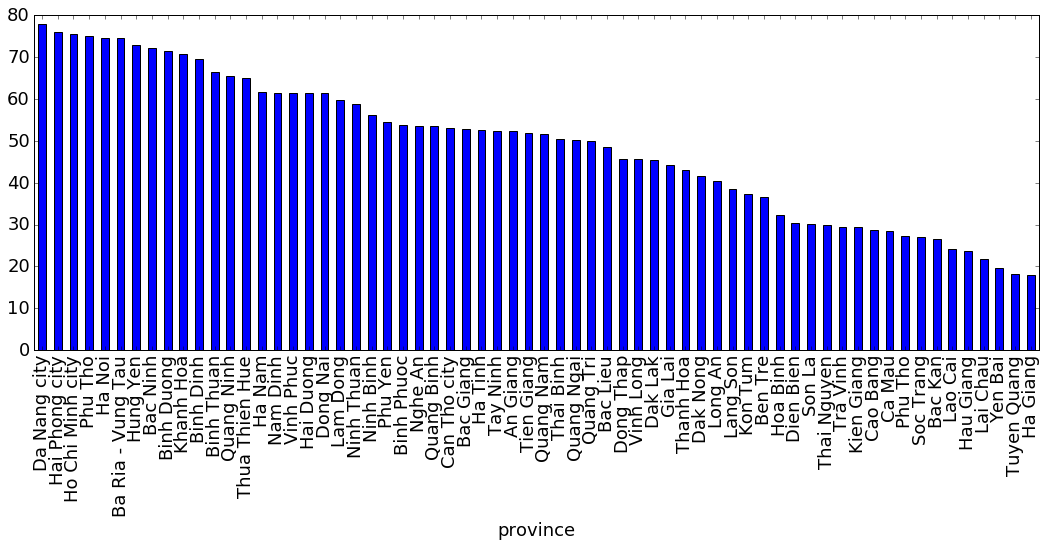

In [12]:
(100*df_with_results.resilience).sort_values(ascending=False).plot.bar(figsize=(18,6))

In [13]:
se_cateroy = pd.DataFrame(pd.cut(df_with_results["resilience"],df_with_results.resilience.quantile([0,1/3,2/3,1]).tolist(), labels=["Low", "Mid", "High"])).rename(
    columns=description)
se_cateroy.head()

,Socio-economic capacity
province,
Ha Noi,High
Ha Giang,NaN
Cao Bang,Low
Bac Kan,Low
Tuyen Quang,Low


In [14]:
categories_to_formated_excel_file(se_cateroy,filename="results/categories.xlsx")

# Policy experiments

Finally, the resilience indicator model can be used to asses the impact of specific policies on asset and welfare losses. In the following we provide two examples. More policy assessment are performed in [render_policy_assessment.ipynb](render_policy_assessment.ipynb)

#### Impact of increasing the income of poor families

In [15]:
df_share1 = compute_resiliences( def_ref_values(df.dropna().assign(cp=df.cp*1.05) ))

#welfare losses
wa=df_with_results.dWtot_currency.sum()*1e-6
wb=df_share1.dWtot_currency.sum()*1e-6

#asset losses
ka = (df_with_results.dKtot).sum()*1e-6
kb = (df_share1.dKtot).sum()*1e-6

nb_countries_all_results = df_with_results["resilience"].dropna().shape[0]

print(" Increasing the income of poor households by 5 percent in the {nb} provincies \
would increase asset losses from {ka:0.2f} to {kb:0.2f} millions per year\
 ({XX:.1%}), but reduce welfare losses by {YY:.1%}".format(
        XX=(kb-ka)/ka,ka=ka,kb=kb,YY=(wa-wb)/wa,nb=nb_countries_all_results)
     )

 Increasing the income of poor households by 5 percent in the 64 provincies would increase asset losses from 1489.95 to 1492.92 millions per year (0.2%), but reduce welfare losses by 1.3%


#### Impact of scaling up social protection

In [16]:
df_su = compute_resiliences( df.dropna().assign(sigma_p=.33,sigma_r=0.33) )

#welfare losses
wa=df_with_results.dWtot_currency.sum()*1e-6
wb=df_su.dWtot_currency.sum()*1e-6

#asset losses
ka = (df_with_results.dKtot).sum()*1e-6
kb = (df_su.dKtot).sum()*1e-6

print("Scaling up social protection to cover one third of asset losses in the {nb} provincies \
would left asset losses unchanged (from {ka:0.2f} to {kb:0.2f} millions per year), \
but reduce welfare losses by {YY:.0%}".format(
        XX=100*(kb-ka)/ka,ka=ka,kb=kb,YY=(wb-wa)/wb,nb=nb_countries_all_results)
     )

Scaling up social protection to cover one third of asset losses in the 64 provincies would left asset losses unchanged (from 1489.95 to 1489.95 millions per year), but reduce welfare losses by -7%
